In [28]:
import requests
import json
import pandas as pd
import numpy as np
import pickle
from data_taking import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
plt.xlabel()

In [7]:
request = requests.get('https://api.tfl.gov.uk/Place/Type/BikePoint')

In [12]:
request.content

b'Request Limit exceeded contact digital@tfl.gov.uk to request a higher rate limit for the api calls you are using.  If you have not specified an app_id and app_key with your request you are using anonymous access which is limited.  Go to the open data section of tfl.gov.uk to register for free access tokens and higher rate limits.'

In [8]:
bikes = request.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [4]:
# len(bikes)

In [5]:
# with open('./bike_test_friday.json', 'w+') as f:
#     f.write(json.dumps(bikes, sort_keys=True, indent=4))

In [6]:
f = open('./data/bike_test_friday.json')

In [7]:
bikes = json.load(f)

In [8]:
print(bikes[1]['commonName'])
for  i in bikes[1]['additionalProperties']:
    print(i['key'], i['value'])
print('lat', bikes[1]['lat'])
print('long', bikes[1]['lon'])

Phillimore Gardens, Kensington
TerminalName 001018
Installed true
Locked false
InstallDate 1278585780000
RemovalDate 
Temporary false
NbBikes 14
NbEmptyDocks 23
NbDocks 37
lat 51.499606
long -0.197574


In [9]:
from datetime import datetime

In [10]:
datetime.now().year

2019

In [11]:
# class BikeTimes():
#     def __init__(self):
#         self.date = datetime.now()
#         self.hour = self.date.hour
#         self.minute = self.date.minute
#         self.url = 'https://api.tfl.gov.uk/Place/Type/BikePoint'
#         self.data = requests.get(self.url).json()
        
#     def save_data(self):
#         with open(f'./bike_data_{self.hour}_{self.minute}.json', 'w+') as f:
#             f.write(json.dumps(self.data, sort_keys = True, indent = 4))
        
        

In [6]:
import requests
bikes = BikeTimes()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [13]:
bikes[0]

{'$type': 'Tfl.Api.Presentation.Entities.Place, Tfl.Api.Presentation.Entities',
 'additionalProperties': [{'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities',
   'category': 'Description',
   'key': 'TerminalName',
   'modified': '2019-11-08T14:11:23.83Z',
   'sourceSystemKey': 'BikePoints',
   'value': '001023'},
  {'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities',
   'category': 'Description',
   'key': 'Installed',
   'modified': '2019-11-08T14:11:23.83Z',
   'sourceSystemKey': 'BikePoints',
   'value': 'true'},
  {'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities',
   'category': 'Description',
   'key': 'Locked',
   'modified': '2019-11-08T14:11:23.83Z',
   'sourceSystemKey': 'BikePoints',
   'value': 'false'},
  {'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities',
   'category': 'Description',
   'key': 'InstallD

In [14]:
#cols = ['name', 'num_bikes', 'num_empty', 'num_docks', 'lat', 'lon']
bikes_list = []
for i in range(len(bikes)):
    name = bikes[i]['commonName']
    time = 't1'
    num_bikes = int(bikes[i]['additionalProperties'][-3]['value'])
    num_empty = int(bikes[i]['additionalProperties'][-2]['value'])
    num_docks = int(bikes[i]['additionalProperties'][-1]['value'])
    lat = bikes[i]['lat']
    lon = bikes[i]['lon']
    faulty = True if num_docks - num_empty - num_bikes > 0 else False
    
#     geo_test = requests.get(f"http://www.datasciencetoolkit.org/coordinates2statistics/{lat}%2c{lon}", params = {'statistics': 'population_density,elevation'}).json()
#     elevation = geo_test[0]['statistics']['elevation']['value']
#     pop_dens = geo_test[0]['statistics']['population_density']['value']
    
    bike_dict = {'name': name,
                 'time': time,
                 'num_bikes': num_bikes,
                 'num_empty': num_empty,
                 'num_docks': num_docks,
                 'coords': (lat,lon),
                 'faulty': faulty}
    
    bikes_list.append(bike_dict)

bikes_list[:5]

[{'name': 'River Street , Clerkenwell',
  'time': 't1',
  'num_bikes': 4,
  'num_empty': 15,
  'num_docks': 19,
  'coords': (51.529163, -0.10997),
  'faulty': False},
 {'name': 'Phillimore Gardens, Kensington',
  'time': 't1',
  'num_bikes': 14,
  'num_empty': 23,
  'num_docks': 37,
  'coords': (51.499606, -0.197574),
  'faulty': False},
 {'name': 'Christopher Street, Liverpool Street',
  'time': 't1',
  'num_bikes': 25,
  'num_empty': 6,
  'num_docks': 32,
  'coords': (51.521283, -0.084605),
  'faulty': True},
 {'name': "St. Chad's Street, King's Cross",
  'time': 't1',
  'num_bikes': 20,
  'num_empty': 3,
  'num_docks': 23,
  'coords': (51.530059, -0.120973),
  'faulty': False},
 {'name': 'New Globe Walk, Bankside',
  'time': 't1',
  'num_bikes': 7,
  'num_empty': 12,
  'num_docks': 19,
  'coords': (51.507385, -0.09644),
  'faulty': False}]

In [15]:
bikes_df = pd.DataFrame(bikes_list)

In [16]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False


In [17]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
name         780 non-null object
time         780 non-null object
num_bikes    780 non-null int64
num_empty    780 non-null int64
num_docks    780 non-null int64
coords       780 non-null object
faulty       780 non-null bool
dtypes: bool(1), int64(3), object(3)
memory usage: 37.4+ KB


In [18]:
# geo_list = []
# for bike in bikes_list:
#     lat = bike['coords'][0]
#     lon = bike['coords'][1]
#     geo_test = requests.get(f"http://www.datasciencetoolkit.org/coordinates2statistics/{lat}%2c{lon}", params = {'statistics': 'population_density,elevation'}).json()
#     elevation = geo_test[0]['statistics']['elevation']['value']
#     pop_dens = geo_test[0]['statistics']['population_density']['value']
#     geo_dict = {'coords': bike['coords'],
#                'elevation': elevation,
#                'pop_dens': pop_dens}
#     geo_list.append(geo_dict)

In [19]:
# geo_list[:5]

In [20]:
# geo_df = pd.DataFrame(geo_list).set_index('coords')

In [21]:
geo_df = pd.read_pickle('geo_dataframe')

In [22]:
geo_df.head()

,elevation,pop_dens,high_pop?
coords,,,
"(51.529163, -0.10997)",31,10010,False
"(51.499606, -0.197574)",17,11436,True
"(51.521283, -0.084605)",27,10010,False
"(51.530059, -0.120973)",22,10010,False
"(51.507385, -0.09644)",16,10010,False


In [23]:
# high_pop = geo_df.pop_dens.quantile(.75)

In [24]:
# geo_df['high_pop'] = geo_df.pop_dens > high_pop

In [25]:
geo_df.head()

,elevation,pop_dens,high_pop?
coords,,,
"(51.529163, -0.10997)",31,10010,False
"(51.499606, -0.197574)",17,11436,True
"(51.521283, -0.084605)",27,10010,False
"(51.530059, -0.120973)",22,10010,False
"(51.507385, -0.09644)",16,10010,False


In [26]:
hill_list = []
for n in range(len(geo_df)):
    lat_n = geo_df.index[n][0]
    lon_n = geo_df.index[n][1]
#     print (lat_n,lon_n)
    elev_list = []
    for i in range(len(geo_df)):
        lat_i = geo_df.index[i][0]
        lon_i = geo_df.index[i][1]
#         print(lat_i,lon_i)
        bol = ((lat_n-lat_i)**2 + (lon_n - lon_i)**2 < 0.000005)
        if bol:
            elev_list.append(geo_df.iloc[i].elevation)
    hill = (geo_df.iloc[n].elevation > np.mean(elev_list))
    hill_list.append(hill)

In [27]:
hill_list[:5]

[False, False, False, True, False]

In [28]:
geo_df['hill'] = hill_list

In [29]:
geo_df.head()

,elevation,pop_dens,high_pop?,hill
coords,,,,
"(51.529163, -0.10997)",31,10010,False,False
"(51.499606, -0.197574)",17,11436,True,False
"(51.521283, -0.084605)",27,10010,False,False
"(51.530059, -0.120973)",22,10010,False,True
"(51.507385, -0.09644)",16,10010,False,False


In [30]:
bikes_df = bikes_df.join(geo_df, on = 'coords')

In [31]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False


In [32]:
bikes_df['num_faulty'] = bikes_df.num_docks - (bikes_df.num_empty + bikes_df.num_bikes)

In [33]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,0
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,0
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,1
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,0
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,0


In [35]:
import seaborn as sns

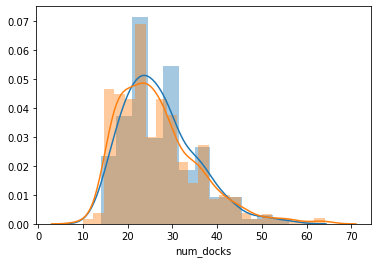

In [37]:
sns.distplot(bikes_df[bikes_df['high_pop?'] == True].num_docks)
sns.distplot(bikes_df.num_docks)

In [133]:
def compare_dists(dataframe, bool_col, col):
    sns.distplot(dataframe[dataframe[bool_col] == True][col])
    sns.distplot(dataframe[dataframe[bool_col]==False][col])

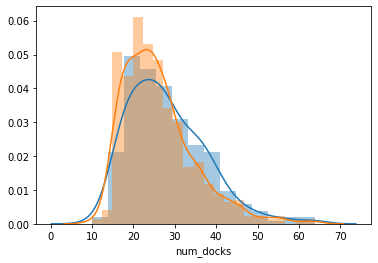

In [134]:
compare_dists(bikes_df, 'faulty', 'num_docks')

In [6]:
high_pop_points = bikes_df[bikes_df['high_pop?'] == True]

In [157]:
high_pop_points.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,0
24,"Commercial Street, Shoreditch",t1,15,1,16,"(51.52127, -0.075578)",False,21,11050,True,False,0
30,"Nesham Street, Wapping",t1,14,2,16,"(51.507131, -0.06691)",False,16,11050,True,False,0
39,"New Inn Yard, Shoreditch",t1,11,8,20,"(51.524526, -0.079248)",True,23,11050,True,True,1
57,"Tanner Street, Bermondsey",t1,15,23,40,"(51.500647, -0.0786)",True,9,11050,True,False,2


In [158]:
len(high_pop_points)

184

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

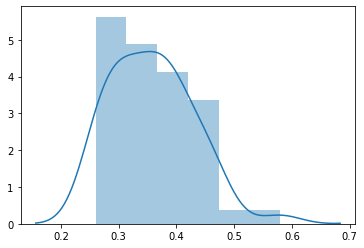

In [178]:
import scipy.stats as stats
np.random.seed(3)
probs_high_pop = []
for i in range(50):
    sample = high_pop_points.sample(n=50, replace = True)
    p = np.sum(sample['faulty'])/50
    probs_high_pop.append(p)

sns.distplot(probs_high_pop, norm_hist= True)

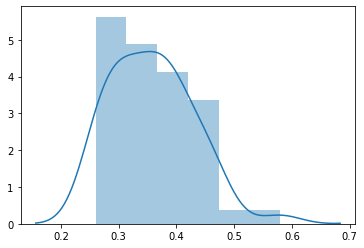

In [199]:
plot_means_of_sample(high_pop_points, 'faulty')

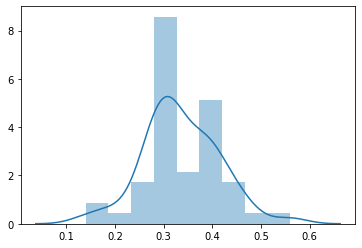

In [166]:
np.random.seed(3)
probs_low_pop = []
for i in range(50):
    sample = bikes_df[bikes_df['high_pop?'] == False].sample(n=50, replace = True)
    p = np.sum(sample.faulty)/50
    probs_low_pop.append(p)


sns.distplot(probs_low_pop, norm_hist = True)

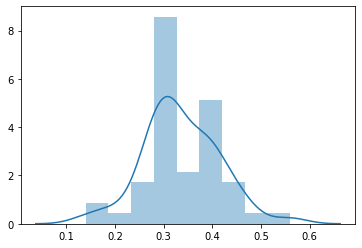

In [200]:
plot_means_of_sample(low_pop_points, 'faulty')

In [105]:
from statsmodels.stats.power import TTestIndPower, TTestPower

power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=.5 , alpha = 0.05, power = 0.8, alternative = 'larger')

50.15078407854107

In [196]:
results = stats.ttest_ind(probs_high_pop, probs_low_pop)
print(results)

Ttest_indResult(statistic=1.4488821623759922, pvalue=0.15056277553091785)


In [170]:
if results[1]<0.05 and results[0] > 0:
    print('Sufficient evidence to reject null hypothesis')
else:
    print ('Not enough evidence to reject null hypothesis')

Sufficient evidence to reject null hypothesis


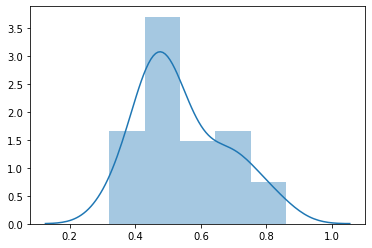

In [186]:
# higher populated areas have more docks per bikepoint
np.random.seed(3)
mean_faulty_high_pop = []
for i in range(50):
    sample = high_pop_points.sample(n=50, replace = True)
    p = np.sum(sample.num_faulty)/50
    mean_faulty_high_pop.append(p)

sns.distplot(mean_faulty_high_pop, norm_hist= True)

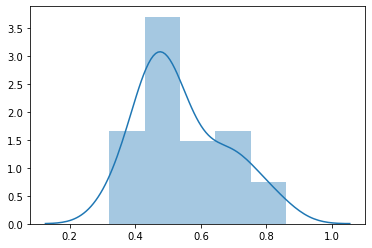

In [183]:
density_of_feature(high_pop_points, 'num_faulty')

In [180]:
low_pop_points = bikes_df[bikes_df['high_pop?']==False]

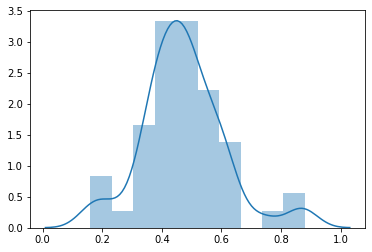

In [188]:
np.random.seed(3)
mean_faulty_low_pop = []
for i in range(50):
    sample = low_pop_points.sample(n=50, replace = True)
    p = np.sum(sample.num_faulty)/50
    mean_faulty_low_pop.append(p)

sns.distplot(mean_faulty_low_pop, norm_hist= True)

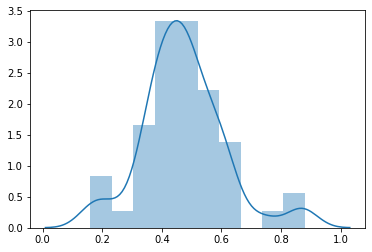

In [187]:
density_of_feature(low_pop_points, 'num_faulty')

In [194]:
stats.ttest_ind(mean_faulty_high_pop, mean_faulty_low_pop)

Ttest_indResult(statistic=2.538139021689327, pvalue=0.012719789497938564)

In [120]:
def split_by_bool(dataframe, col):
    true_df = dataframe[dataframe[col]==True]
    false_df = dataframe[dataframe[col]==False]
    return true_df, false_df

In [121]:
high_pop_points, low_pop_points = split_by_bool(bikes_df, 'high_pop?')

In [122]:
high_pop_points.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,0
24,"Commercial Street, Shoreditch",t1,15,1,16,"(51.52127, -0.075578)",False,21,11050,True,False,0
30,"Nesham Street, Wapping",t1,14,2,16,"(51.507131, -0.06691)",False,16,11050,True,False,0
39,"New Inn Yard, Shoreditch",t1,11,8,20,"(51.524526, -0.079248)",True,23,11050,True,True,1
57,"Tanner Street, Bermondsey",t1,15,23,40,"(51.500647, -0.0786)",True,9,11050,True,False,2


In [137]:
high_pop_points.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,0
24,"Commercial Street, Shoreditch",t1,15,1,16,"(51.52127, -0.075578)",False,21,11050,True,False,0
30,"Nesham Street, Wapping",t1,14,2,16,"(51.507131, -0.06691)",False,16,11050,True,False,0
39,"New Inn Yard, Shoreditch",t1,11,8,20,"(51.524526, -0.079248)",True,23,11050,True,True,1
57,"Tanner Street, Bermondsey",t1,15,23,40,"(51.500647, -0.0786)",True,9,11050,True,False,2


In [18]:
def plot_means_of_sample(dataframe, feature, sample_size = 50, num_sims = 50, seed = 3):
    np.random.seed(seed)
    preds = []
    for i in range(num_sims):
        sample = dataframe.sample(n= sample_size, replace = True)
        mean = np.sum(sample[feature])/sample_size
        preds.append(mean)
    
    fig = plt.figure(figsize = (10,7))
    sns.distplot(preds, norm_hist = True)
    plt.title(f'Mean of {feature} from samples of data')
    plt.xlabel(f'Average {feature}')
    plt.ylabel('Density')
    plt.show()

In [198]:
def get_means_of_sample(dataframe, feature, sample_size = 50, num_sims = 50, seed = 3):
    np.random.seed(seed)
    preds = []
    for i in range(num_sims):
        sample = dataframe.sample(n= sample_size, replace = True)
        mean = np.sum(sample[feature])/sample_size
        preds.append(mean)

    return preds

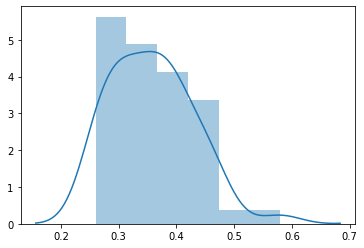

In [150]:
np.random.seed(3)
probs_high_pop = []
for i in range(50):
    sample = high_pop_points.sample(n=50, replace = True)
    p = np.sum(sample['faulty'])/50
    probs_high_pop.append(p)

sns.distplot(probs_high_pop, norm_hist= True)

In [202]:
def t_test(dataframe, bool_col, variable):
    true_df, false_df = split_by_bool(dataframe, bool_col)
    means1 = sample_means_of_feature(true_df, variable)
    means2 = sample_means_of_feature(false_df, variable)
    results = stats.ttest_ind(means1, means2)
    print(f't-statistic: {results[0]} with p value: {results[1]}')
    return results[0], results[1]
    



In [203]:
t_test(bikes_df, 'high_pop?', 'num_faulty')

t-statistic: 2.538139021689327 with p value: 0.012719789497938564


(2.538139021689327, 0.012719789497938564)

In [17]:
bikes_df = pd.read_pickle('bikes_dataframe')
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near,num_faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,1,False,0
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,1,False,0
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,3,True,1
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,3,True,0
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,1,False,0


In [54]:
geo = GeoGetter()

In [55]:
geo.create_df(bikes_df)

In [56]:
geo.df.head()

,elevation,pop_dens
coords,,
"(51.529163, -0.10997)",31,10010
"(51.499606, -0.197574)",17,11436
"(51.521283, -0.084605)",27,10010
"(51.530059, -0.120973)",22,10010
"(51.507385, -0.09644)",16,10010


In [43]:
geo

In [57]:
geo.df

,elevation,pop_dens
coords,,
"(51.529163, -0.10997)",31,10010
"(51.499606, -0.197574)",17,11436
"(51.521283, -0.084605)",27,10010
"(51.530059, -0.120973)",22,10010
"(51.507385, -0.09644)",16,10010
...,...,...
"(51.501513, -0.123823)",11,10010
"(51.50621, -0.114842)",13,10010
"(51.492807, -0.091938)",4,10028


In [58]:
geo.add_hill_data()

In [59]:
geo.df.head()

,elevation,pop_dens,hill
coords,,,
"(51.529163, -0.10997)",31,10010,False
"(51.499606, -0.197574)",17,11436,False
"(51.521283, -0.084605)",27,10010,False
"(51.530059, -0.120973)",22,10010,True
"(51.507385, -0.09644)",16,10010,False


In [60]:
geo.add_pop_data()

In [61]:
geo.df

,elevation,pop_dens,hill,high_pop
coords,,,,
"(51.529163, -0.10997)",31,10010,False,False
"(51.499606, -0.197574)",17,11436,False,True
"(51.521283, -0.084605)",27,10010,False,False
"(51.530059, -0.120973)",22,10010,True,False
"(51.507385, -0.09644)",16,10010,False,False
...,...,...,...,...
"(51.501513, -0.123823)",11,10010,False,False
"(51.50621, -0.114842)",13,10010,False,False
"(51.492807, -0.091938)",4,10028,False,False


In [62]:
geo_df = geo.get_df()

In [63]:
geo_df.head()

,elevation,pop_dens,hill,high_pop
coords,,,,
"(51.529163, -0.10997)",31,10010,False,False
"(51.499606, -0.197574)",17,11436,False,True
"(51.521283, -0.084605)",27,10010,False,False
"(51.530059, -0.120973)",22,10010,True,False
"(51.507385, -0.09644)",16,10010,False,False


In [4]:
bikes_df = pd.read_pickle('bikes_dataframe')

In [5]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near,num_faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,1,False,0
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,1,False,0
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,3,True,1
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,3,True,0
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,1,False,0


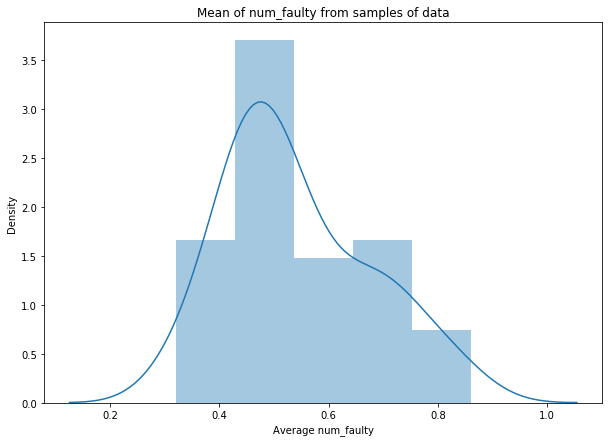

In [19]:
plot_means_of_sample(high_pop_points, 'num_faulty')

In [26]:
def get_means_of_sample(dataframe, feature, sample_size = 50, num_sims = 50, seed = 3):
    np.random.seed(seed)
    preds = []
    for i in range(num_sims):
        sample = dataframe.sample(n= sample_size, replace = True)
        mean = np.sum(sample[feature])/sample_size
        preds.append(mean)

    return preds

def plot_means_of_sample(dataframe, feature, sample_size = 50, num_sims = 50, seed = 3):
    preds = get_means_of_sample(dataframe, feature, sample_size, num_sims, seed)
    fig = plt.figure(figsize = (10,7))
    sns.distplot(preds, norm_hist = True)
    plt.title(f'Mean of {feature} from samples of data')
    plt.xlabel(f'Average {feature}')
    plt.ylabel('Density')
    plt.show()

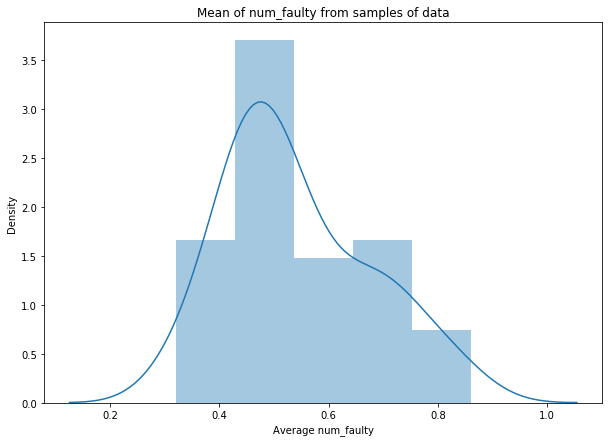

In [27]:
plot_means_of_sample(high_pop_points, 'num_faulty')

In [35]:
def split_by_bool(dataframe, col):
    true_df = dataframe[dataframe[col]==True]
    false_df = dataframe[dataframe[col]==False]
    return true_df, false_df

def get_means_of_sample(dataframe, feature, sample_size = 50, num_sims = 50, seed = 3):
    np.random.seed(seed)
    preds = []
    for i in range(num_sims):
        sample = dataframe.sample(n= sample_size, replace = True)
        mean = np.sum(sample[feature])/sample_size
        preds.append(mean)

    return preds

def plot_means_of_sample(dataframe, feature, sample_size = 50, num_sims = 50, seed = 3):
    preds = get_means_of_sample(dataframe, feature, sample_size, num_sims, seed)
    fig = plt.figure(figsize = (10,7))
    sns.distplot(preds, norm_hist = True)
    plt.title(f'Mean of {feature} from samples of data')
    plt.xlabel(f'Average {feature}')
    plt.ylabel('Density')
    plt.show()

def coh_d(sample1, sample2):
    n_1 = len(sample1)
    n_2 = len(sample2)
    std_1 = np.std(sample1, ddof = 1)
    std_2 = np.std(sample2, ddof = 1)
    dof = n_1 + n_2 - 2
    num = np.mean(sample1) - np.mean(sample2)
    denom = np.sqrt(((n_1 - 1)*std_1 + (n_2 - 1)*std_2)/dof)
    return num/denom

# def create_sample_dists(cleaned_data, y_var=None, categories=[]):
#     """
#     Each hypothesis test will require you to create a sample distribution from your data
#     Best make a repeatable function

#     :param cleaned_data:
#     :param y_var: The numeric variable you are comparing
#     :param categories: the categories whose means you are comparing
#     :return: a list of sample distributions to be used in subsequent t-tests

#     """
#     htest_dfs = []

#     # Main chunk of code using t-tests or z-tests
#     return htest_dfs

def compare_pval_alpha(p_val, alpha = 0.05):
    status = ''
    if p_val > alpha:
        status = "Fail to reject"
    else:
        status = 'Reject'
    return status


def hypothesis_test_one(cleaned_data, alpha = 0.05):
    """
    Describe the purpose of your hypothesis test in the docstring
    These functions should be able to test different levels of alpha for the hypothesis test.
    If a value of alpha is entered that is outside of the acceptable range, an error should be raised.

    :param alpha: the critical value of choice
    :param cleaned_data:
    :return:
    """
    if alpha <= 0 or alpha >= 1:
        return 'Error. Alpha value must be between 0 and 1.'
    # Get data for tests
    faulty_bikes_df, non_faulty_bikes_df = split_by_bool(cleaned_data, 'faulty')
    plot_means_of_sample(faulty_bikes_df, 'faulty_near')
    plot_means_of_sample(non_faulty_bikes_df, 'faulty_near')

    ###
    # Main chunk of code using t-tests or z-tests, effect size, power, etc
    ###
    sample1 = get_means_of_sample(faulty_bikes_df, 'faulty_near', num_sims = 198)
    sample2 = get_means_of_sample(non_faulty_bikes_df, 'faulty_near', num_sims = 198)
    
    results = stats.ttest_ind(sample1, sample2)
    t_val = results[0]
    p_val = results[1]
    
    d = coh_d(sample1, sample2)
    power = 0.8
    # starter code for return statement and printed results
    status = compare_pval_alpha(p_val, alpha)
    assertion = ''
    if status == 'Fail to reject':
        assertion = 'cannot'
    else:
        assertion = "can"
        # calculations for effect size, power, etc here as well

    print(f'Based on the p value of {p_val} and our aplha of {alpha} we {status.lower()}  the null hypothesis.'
          f'\n Due to these results, we {assertion} state that there is a difference between NONE')

    if assertion == 'can':
        print(f"with an effect size, cohen's d, of {str(d)} and power of {power}.")
    else:
        print(".")

    return status

In [36]:
sns.set_style('whitegrid')

In [42]:
def hypothesis_test_one(cleaned_data, alpha = 0.05):
    """
    Describe the purpose of your hypothesis test in the docstring
    These functions should be able to test different levels of alpha for the hypothesis test.
    If a value of alpha is entered that is outside of the acceptable range, an error should be raised.

    :param alpha: the critical value of choice
    :param cleaned_data:
    :return:
    """
    if alpha <= 0 or alpha >= 1:
        return 'Error. Alpha value must be between 0 and 1.'
    # Get data for tests
    faulty_bikes_df, non_faulty_bikes_df = split_by_bool(cleaned_data, 'faulty')
    plot_means_of_sample(faulty_bikes_df, 'faulty_near')
    plot_means_of_sample(non_faulty_bikes_df, 'faulty_near')

    ###
    # Main chunk of code using t-tests or z-tests, effect size, power, etc
    ###
    sample1 = get_means_of_sample(faulty_bikes_df, 'faulty_near', num_sims = 198)
    sample2 = get_means_of_sample(non_faulty_bikes_df, 'faulty_near', num_sims = 198)
    
    results = stats.ttest_ind(sample1, sample2)
    t_val = results[0]
    p_val = results[1]
    
    d = coh_d(sample1, sample2)
    power = 0.8
    # starter code for return statement and printed results
    status = compare_pval_alpha(p_val, alpha)
    assertion = ''
    if status == 'Fail to reject':
        assertion = 'cannot'
    else:
        assertion = "can"
        # calculations for effect size, power, etc here as well

    print(f'Based on the p value of {p_val} and our aplha of {alpha} we {status.lower()}  the null hypothesis.'
          f'\nDue to these results, we {assertion} state that there is a difference between the probability'
          '\nof having a faulty bikepoint nearby for faulty bikepoints and non-faulty bikepoints')

    if assertion == 'can':
        print(f"with an effect size, cohen's d, of {str(d)} and power of {power}.")
    else:
        print(".")

    return status

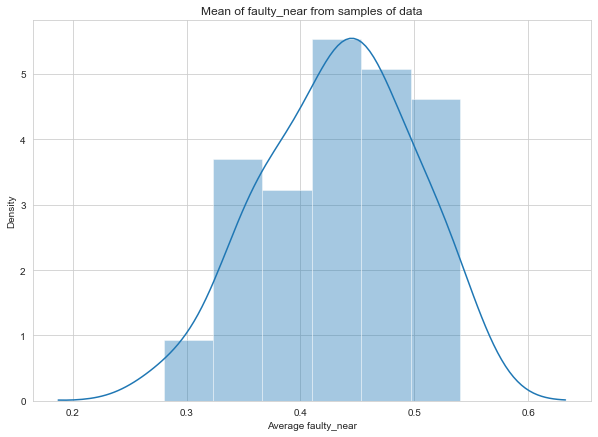

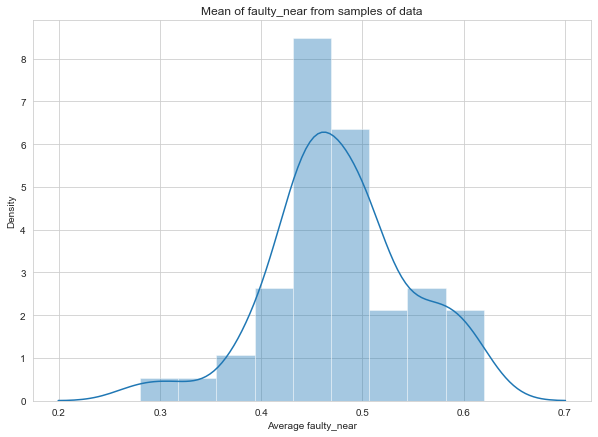

Based on the p value of 4.217402024387721e-10 and our aplha of 0.05 we reject  the null hypothesis.
Due to these results, we can state that there is a difference between the probability
of having a faulty bikepoint nearby for faulty bikepoints and non-faulty bikepoints
with an effect size, cohen's d, of -0.16882695484904997 and power of 0.8.


'Reject'

In [43]:
hypothesis_test_one(bikes_df)